# Ok Cupid Dataset EDA

This dataset was picked on the name alone to do an initial clean and EDA.
The dataset is completly unfamiliar to me - I want to practice familiarising myself with the set and seeing what I can learn about it, to see what further investigation can stem from it. 

Currently, I am not altering any anomilies in the data (such as users with an age of 110), just noting them. This is because there is no question specified about the data and one may query things suchs as profile quality, and radical values would contribute to the understanding in that area. 

## Prepare for Data Analysis

### Load Packages

In [2]:
# initial imports and check file is readable
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image # linked to generating a wordcloud
from os import path # for wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # for wordcloud !! May only run with Python 3.10

import re #regular expressions
import nltk
#nltk.download()
from nltk.tokenize import word_tokenize #turn strings into lists
from nltk.corpus import stopwords # remove words like 'a', 'an' etc.
stop_words = set(stopwords.words('english')) #imports the english stopwords
from nltk.stem import PorterStemmer #for 'stemming' words to improve search/assessments
stemmer = PorterStemmer()

okcupid = pd.read_csv('OkCupid_kaggle_dataset.zip')


In [ ]:
# not sure what this is currently - took it from the wordcloud tutorial
#c:\intelpython3\lib\site-packages\matplotlib\__init__.py:
#import warnings
#warnings.filterwarnings("ignore")


## Visualisations of non-freeform answers

This is a placeholder to do some visualisations of the variables above to help give an overview of the dataset

# Statistics

Placeholder to consider statistics from the set

# The essays
Each profile has 'essays' - free form answer questions.
This section looks to be suited to a language focused analysis, enabling answering questions such as:
* which words are most frequently used
* which topics most frenquently arise

Explore sorting and filtering words and create a word cloud for to display frequencies

In [4]:
from nltk import TweetTokenizer #TweetTokenizer was tried so solve another problem 
# but for the context it may be more applicable than word_tokenize()
tokens_main = []
for col in okcupid.filter(regex="essay\d+", axis=1).columns: #regex="essay\d+" tells to apply to cols with this title, \d+ is a digit +1
    okcupid[col] = okcupid[col].str.replace("[.?!,:;()\-\"]", "", regex=True)
    tokens = nltk.TweetTokenizer().tokenize(str(okcupid[col])) # I'd like to understand what okcupid[col] is withouth str() and why str() is needed
    tokens_no_stops = [word for word in tokens if word not in stop_words]
    tokens_no_stops = [word for word in tokens_no_stops if word not in ['NaN', '...', 'im']]
    tokens_main += tokens_no_stops #this may be an issue - better try tokens_main.append(tokens_no_stops)
print(len(tokens_main))
print(tokens_main)

632
['0', 'would', 'love', 'think', 'som', '1', 'chef', 'means', '1', 'w', '2', "i'm", 'ashamed', 'much', 'writing', 'public', 'tex', '3', 'work', 'library', 'go', 'school', '4', 'hey', "how's", 'going', 'currently', 'vague', 'prof', '...\n   ...', '59941', 'vibrant', 'expressive', 'caring', 'optimist', 'love', 'bein', '59942', "i'm", 'nick', 'never', 'know', 'write', 'myse', '59943', 'hello', 'enjoy', 'traveling', 'watching', 'movies', 'ha', '59944', 'world', 'balls', '59945', 'odd', 'little', 'enemy', 'status', 'wi', 'Name', ':', 'essay', '0', ',', 'Length', ':', '59946', ',', 'dtype', ':', 'object', '0', 'currently', 'working', 'international', 'agent', 'fo', '1', 'dedicating', 'everyday', 'unbelievable', 'b', '2', 'make', 'nerdy', 'software', 'musicians', 'artists', '3', 'reading', 'things', 'written', 'old', 'dead', 'people', '4', 'work', 'work', 'work', 'work', '+', 'play', '59941', 'happiest', 'times', 'life', 'came', '59942', 'currently', 'finishing', 'school', 'film', 'product

In [13]:
def tokenize(dict_key):
    data = dict_key.replace("[.?!,:;()\-\"]", "") # regex=True) what is the difference by not adding regex=True?
    tokens = nltk.TweetTokenizer.tokenize(data)
    tokens_no_stops = [word for word in tokens if word not in stop_words]
    tokens_no_stops = [word for word in tokens_no_stops if word not in ['NaN', '...', 'im']]


In [48]:
essay9 = okcupid['essay9']

In [49]:
essay9 = pd.DataFrame(essay9).replace("[.?!,:;()\-\"]", "", regex=True) # this works!

In [ ]:
# drop NaN values here/around here somehow

In [50]:
essay9 = essay9.apply(lambda row: nltk.word_tokenize(str(row['essay9'])), axis=1) #solved expected string or bytes-like object by wrapping tokenize arg in str 

In [51]:
essay9_drppd = essay9.apply(lambda row: [word for word in row if word not in stop_words])

In [53]:
print(essay9_drppd)

0        [want, swept, feet, tired, norm, want, catch, ...
1                                                    [nan]
2        [bright, open, intense, silly, ironic, critica...
3                                         [feel, inclined]
4                                                    [nan]
                               ...                        
59941       [seeking, long, term, connection, shared, joy]
59942                        [meh, made, far, might, well]
59943                                 [similar, interests]
59944                            [interested, interesting]
59945    [backbone, opinion, sense, humor, want, meet, ...
Length: 59946, dtype: object


In [52]:
print(essay9)

0        [you, want, to, be, swept, off, your, feet, yo...
1                                                    [nan]
2        [you, are, bright, open, intense, silly, ironi...
3                                [you, feel, so, inclined]
4                                                    [nan]
                               ...                        
59941    [you, are, seeking, a, long, term, connection,...
59942    [meh, if, you, made, it, this, far, you, might...
59943                       [we, have, similar, interests]
59944             [you, are, interested, and, interesting]
59945    [if, you, have, a, backbone, an, opinion, a, s...
Length: 59946, dtype: object


In [37]:
#df = pd.DataFrame({'sentences': ['This is a very good site. I will recommend it to others.', 'Can you please give me a call at 9983938428. have issues with the listings.', 'good work! keep it up']})
tokenized_sents = essay9.apply(lambda row: nltk.word_tokenize(row['essay9']), axis=1)

SyntaxError: positional argument follows keyword argument (1415318321.py, line 2)

In [8]:
tokens_main = []
for row in okcupid.iterrows():
    for col in okcupid.filter(regex="essay9", axis=1).columns: #regex="essay\d+" tells to apply to cols with this title, \d+ is a digit +1
        okcupid[col] = okcupid[col].str.replace("[.?!,:;()\-\"]", "", regex=True)
        tokens = nltk.TweetTokenizer().tokenize(str(okcupid[col])) # I'd like to understand what okcupid[col] is withouth str() and why str() is needed
        tokens_no_stops = [word for word in tokens if word not in stop_words]
        tokens_no_stops = [word for word in tokens_no_stops if word not in ['NaN', '...', 'im']]
        tokens_main += tokens_no_stops #this may be an issue - better try tokens_main.append(tokens_no_stops)

KeyboardInterrupt: 

In [ ]:
print(tokens_main[-25:]) # there looks to be a lot of junk in here like column headings and row numbers
print(tokens_main[:25])

['59942', 'meh', 'made', 'far', 'might', 'well', '59943', 'similar', 'interests', '59944', 'interested', 'interesting', '59945', 'back-bone', 'opinion', 'sense', '...', 'Name', ':', 'essay', '9', ',', 'dtype', ':', 'object']
['0', 'would', 'love', 'think', 'som', '...', '1', 'chef', 'means', '1', 'w', '...', '2', 'im', 'ashamed', 'much', 'writing', 'public', 'text', '...', '3', 'work', 'library', 'go', 'school']


In [4]:
# generate a dictionary with the key being the word and the value being the frequency of the word
tokens_dict = {}
for word in tokens_main:
    if word in tokens_dict:
        tokens_dict[word] = tokens_dict[word]+1
    else:
        tokens_dict[word]=1

print(tokens_dict)
#print(len(tokens_dict))

{'0': 11, 'would': 2, 'love': 2, 'think': 2, 'som': 1, '1': 13, 'chef': 1, 'means': 1, 'w': 1, '2': 11, "i'm": 5, 'ashamed': 1, 'much': 1, 'writing': 2, 'public': 1, 'tex': 1, '3': 11, 'work': 8, 'library': 1, 'go': 1, 'school': 2, '4': 11, 'hey': 1, "how's": 1, 'going': 1, 'currently': 3, 'vague': 1, 'prof': 1, '...\n   ...': 3, '59941': 10, 'vibrant': 1, 'expressive': 1, 'caring': 1, 'optimist': 1, 'bein': 1, '59942': 10, 'nick': 1, 'never': 1, 'know': 3, 'write': 1, 'myse': 1, '59943': 10, 'hello': 1, 'enjoy': 1, 'traveling': 1, 'watching': 1, 'movies': 3, 'ha': 1, '59944': 10, 'world': 1, 'balls': 1, '59945': 10, 'odd': 1, 'little': 1, 'enemy': 1, 'status': 1, 'wi': 1, 'Name': 10, ':': 30, 'essay': 10, ',': 20, 'Length': 10, '59946': 10, 'dtype': 10, 'object': 10, 'working': 1, 'international': 1, 'agent': 1, 'fo': 1, 'dedicating': 1, 'everyday': 1, 'unbelievable': 1, 'b': 2, 'make': 3, 'nerdy': 1, 'software': 1, 'musicians': 2, 'artists': 1, 'reading': 1, 'things': 4, 'written': 1

In [7]:
tokens_dict['']

2

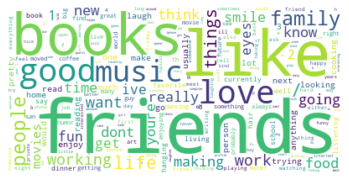

In [ ]:
# Generate the word cloud from the frequency dictionary
wordcloud = WordCloud(background_color='white').generate_from_frequencies(tokens_dict)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Below are bits of code I used to test & develop

In [ ]:
#book_list = []
#for word in tokens_main:
#    if word.startswith('books'):
#        print(word)
#        book_list.append(word)

In [ ]:
# This was the first version - it seems to be taking the whole of tokens_main, 
# turning it into a massive string and then splitting it up, leaving in the '? And it produces doubles..
#wordcloud = WordCloud(background_color='white').generate(str(tokens_main))

# Display the generated image:
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
#plt.show()

In [ ]:
# ----- don'd actually think this is needed for now -----#

#essay0 = okcupid.essay0.dropna()
#essay1 = okcupid.essay1.dropna()
#essay2 = okcupid.essay2.dropna()
#essay3 = okcupid.essay3.dropna()
#essay4 = okcupid.essay4.dropna()
#essay5 = okcupid.essay5.dropna()
#essay6 = okcupid.essay6.dropna()
#essay7 = okcupid.essay7.dropna()
#essay8 = okcupid.essay8.dropna()
#essay9 = okcupid.essay9.dropna()

#print(len(essay0))
#print(essay0)

#------#

In [ ]:
#print(okcupid['essay0'])
#tokens = nltk.word_tokenize(str(okcupid['essay0']))
#print(tokens)

In [ ]:
#essay0 = essay0.astype('string')  # this is the only way I could find to convert to string
## dont think i need this anymore

Here a sticking point was having not installed nltk - it was installed on pip but I needed to run:
import nltk
nltk.download()
then save all the packages in C:\nltk_data
Note: that code only needs to be run the once to install, then delete/comment out

In [ ]:
## This was a trial with one essay

#essay_master = essay0
#print(essay_master[0].title())
#essay_master = re.sub(r'[\.\?\!\,\:\;\(\)\"]', '', essay_master[0])
#print(essay_master)

#essay_tokens = word_tokenize(essay_master) # tokenize/ turn string into a list of words
#print(essay_tokens)

#essay_no_stops = [word for word in essay_tokens if word not in stop_words] # uses list comprehension to remove stopwords
#print(essay_no_stops)


In [ ]:
#?WordCloud 
# this is the docstring showing the options of the function